# A. Matplotlib

## Import Python libraries for visualization

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Simple plots with Matplotlib Pyplot
Documentation: https://matplotlib.org/stable/api/pyplot_summary.html

Some common chart types that can be created using matplotlib:
- Line graph

```
  plt.plot()
```

- Bar chart

```
  plt.bar()
  ```
- Scatterplot

```
  plt.scatter()
  ```
- Pie chart

```
  plt.pie()
  ```

---

### 1. Line graph

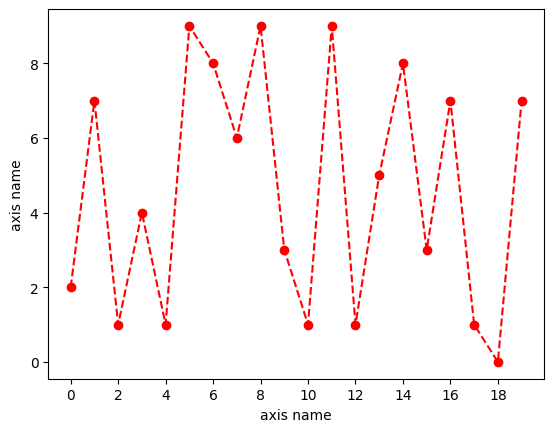

In [ ]:
x = np.arange(20)
y = np.random.randint(10, size=20)

plt.xlabel('axis name')
plt.ylabel('axis name')
plt.title('title-of-chart', fontsize=, color=, figsize=)

# Ticks
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Create a list of ticks to pass in plt.xticks()
#list_ticks = range()
#plt.xticks(list_ticks)


#plt.plot(x, y, "ro--")            #r: color red, o: marker (thick dot), --: line format
#plt.legend(["x to y"])
#plt.title("")

# Short-hand way
#plt.plot(x, y, label='2x', color='pink', linewidth=2, linestyle='--', marker='p',
#         markersize=10, markeredgecolor='hotpink')   # p for pentagon
#plt.legend()
plt.show()

### 2. Matplotlib subplots

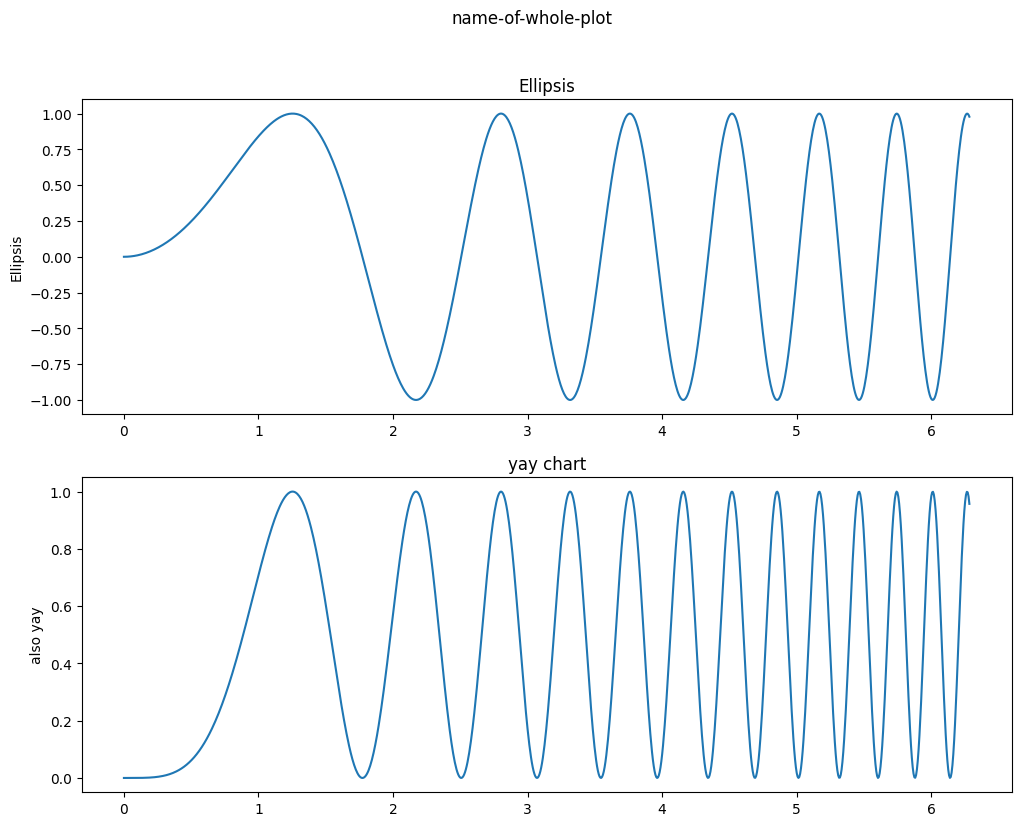

In [ ]:
number_of_value = ...
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x ** 2)

fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (12, 9))
fig.suptitle('name-of-whole-plot')

axs[0].plot(x, y)
#axs[0].set_xlabel("")
axs[0].set_ylabel(...)
axs[0].set_title(...)

axs[1].plot(x, y**2)
#axs[1].set_xlabel("yay")
axs[1].set_ylabel("also yay")
axs[1].set_title("yay chart")
plt.show()

# B. Seaborn

### 1. Histogram

In [ ]:
x = np.random.rand(5000)         # uniform distribution
y = np.random.randn(5000)        # gaussian distribution (bell curve)

#sns.displot(x)
#sns.hisplot(y)

---

## Visualization with real-life data

1. Line graph with gold stock data
2. Bar graph/ Histogram with car sales data

## Upload and inspect your dataset

### Gold stock data

In [ ]:
df_gold = pd.read_csv("goldstock.csv")
df_gold.head()

,Date,Close,Volume,Open,High,Low
0,1/22/2014,1238.6,80262,1240.5,1243.5,1235.5
1,1/23/2014,1262.5,41697,1235.1,1267.1,1230.8
2,1/24/2014,1264.5,34998,1264.3,1273.2,1256.9
3,1/27/2014,1263.5,63419,1269.9,1280.1,1252.0
4,1/28/2014,1250.5,81426,1254.9,1261.9,1248.0


In [ ]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2498 non-null   object 
 1   Close   2498 non-null   float64
 2   Volume  2498 non-null   int64  
 3   Open    2498 non-null   float64
 4   High    2498 non-null   float64
 5   Low     2498 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 117.2+ KB


In [ ]:
df_gold.describe()

- Use pandas.DataFrame.plot: gives you an overview visualization of the data




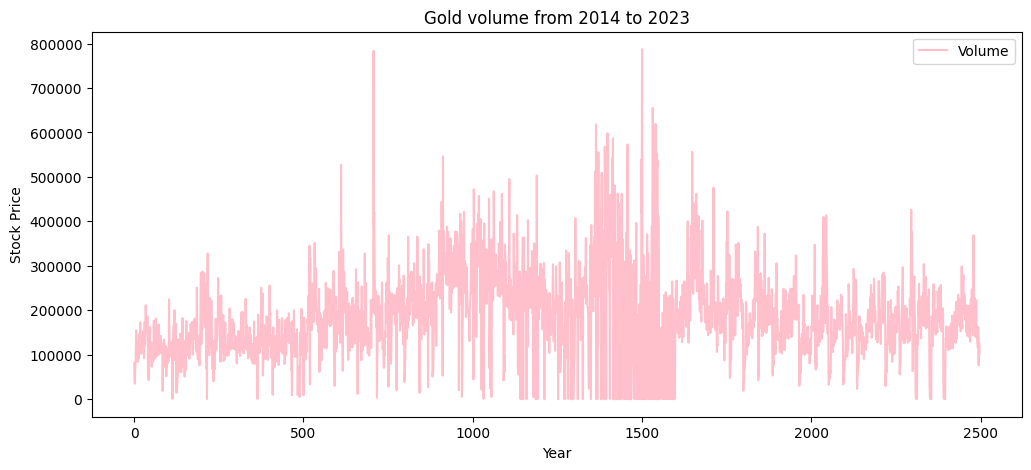

In [ ]:
df_gold.plot(y="Volume", color="pink",
        xlabel="Year", ylabel="Stock Price", title="Gold volume from 2014 to 2023",
        legend=["Volume"], figsize=[12, 5])
plt.show()

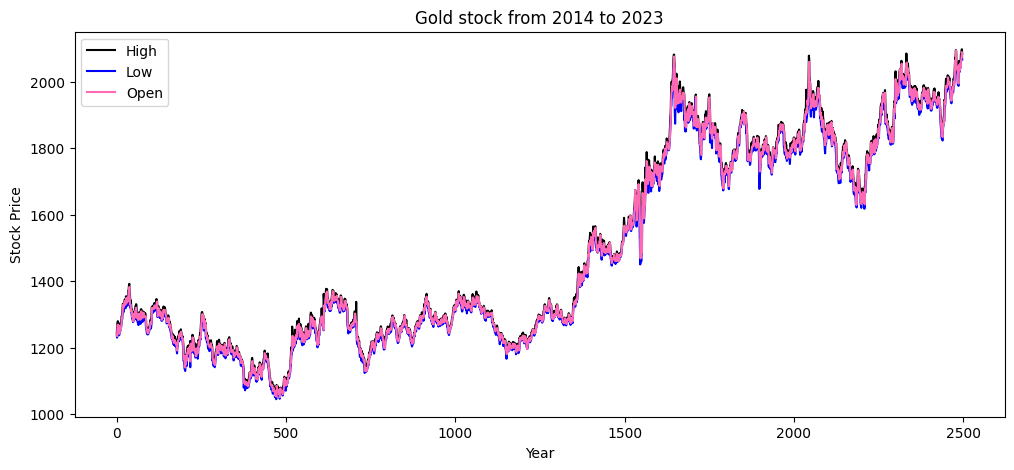

In [ ]:
df_gold.plot(y=["High", "Low", "Open"], color=["black", "blue", "hotpink"],
        xlabel="Year", ylabel="Stock Price", title="Gold stock from 2014 to 2023",
        legend=["Volume"], figsize=[12, 5])

plt.show()

### Use Matplotlib

In [ ]:
df_gold.head()

,Date,Close,Volume,Open,High,Low,Year
0,1/22/2014,1238.6,80262,1240.5,1243.5,1235.5,2014
1,1/23/2014,1262.5,41697,1235.1,1267.1,1230.8,2014
2,1/24/2014,1264.5,34998,1264.3,1273.2,1256.9,2014
3,1/27/2014,1263.5,63419,1269.9,1280.1,1252.0,2014
4,1/28/2014,1250.5,81426,1254.9,1261.9,1248.0,2014


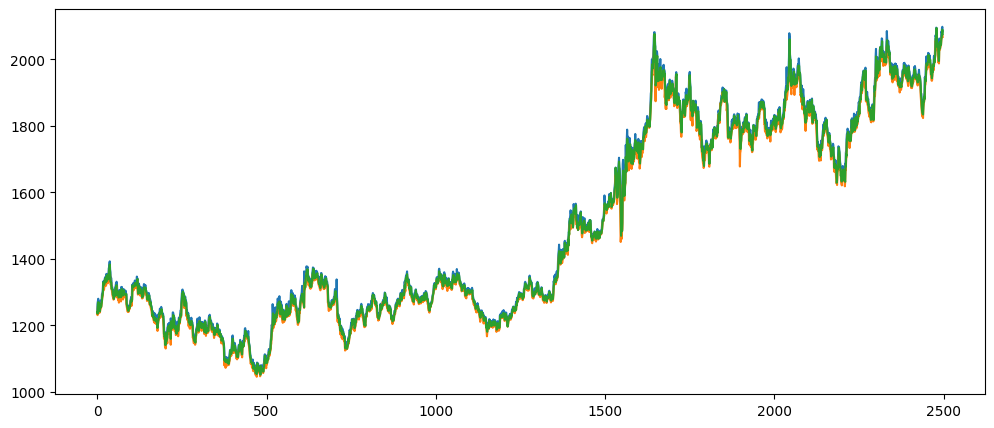

In [ ]:
x = df_gold.index
y = df_gold[["High", "Low", "Open"]]

plt.figure(figsize=(12, 5))

plt.plot(x, y)
plt.show()

### Set x-ticks (We will go over this very quickly)

In [ ]:
df_gold["Year"] = [x[-4:] for x in df_gold["Date"].astype("string")]
year_ticks = range(2014, 2024)
y = df_gold["Low"]
df_gold.head()

,Date,Close,Volume,Open,High,Low,Year
0,1/22/2014,1238.6,80262,1240.5,1243.5,1235.5,2014
1,1/23/2014,1262.5,41697,1235.1,1267.1,1230.8,2014
2,1/24/2014,1264.5,34998,1264.3,1273.2,1256.9,2014
3,1/27/2014,1263.5,63419,1269.9,1280.1,1252.0,2014
4,1/28/2014,1250.5,81426,1254.9,1261.9,1248.0,2014


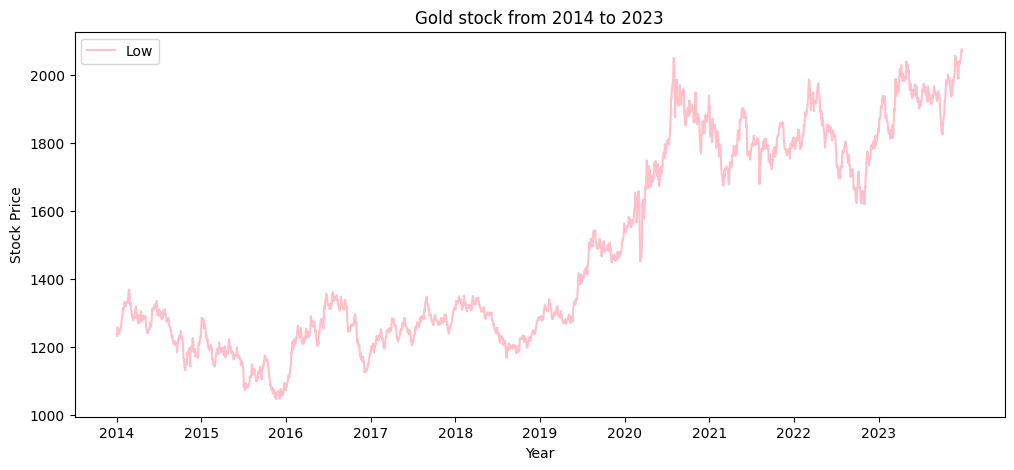

In [ ]:
ax = y.plot(color="pink", xlabel="Year", ylabel="Stock Price", title="Gold stock from 2014 to 2023", legend=["Volume"], figsize=[12, 5])

plt.xticks(df_gold.index[::250], year_ticks)
plt.show()

## Create a bar chart containing total gold stock per year

In [ ]:
df_gold_total = df_gold.groupby("Year").sum(numeric_only=True).reset_index()
df_gold_total.head()

,Year,Close,Volume,Open,High,Low
0,2014,303015.4,29319585,302926.1,305067.7,300941.6
1,2015,292020.0,32426701,292154.7,294175.0,290075.2
2,2016,315432.2,44892335,315251.0,317805.0,313060.1
3,2017,316403.6,58976690,316300.6,317922.3,314681.3
4,2018,318005.4,60460634,318046.2,319591.9,316423.7


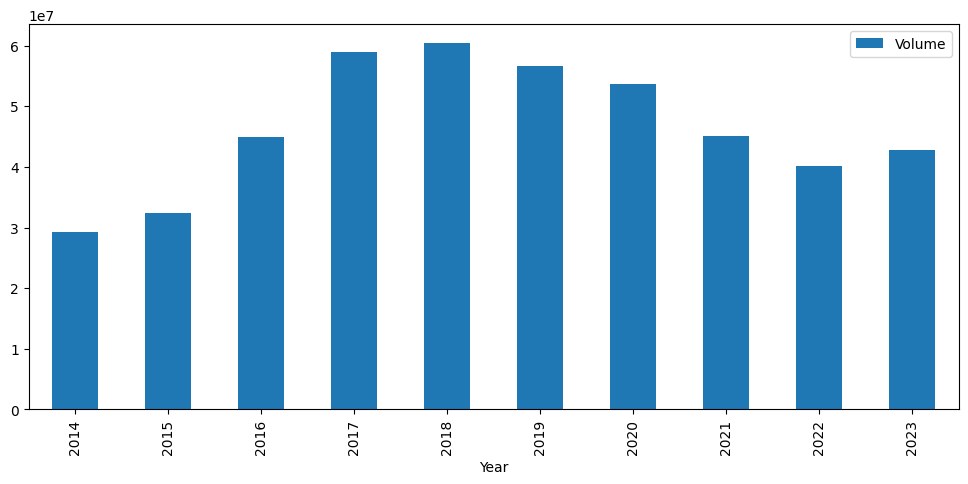

In [ ]:
df_gold_total.plot(...)

plt.show()

- Use Matplotlib



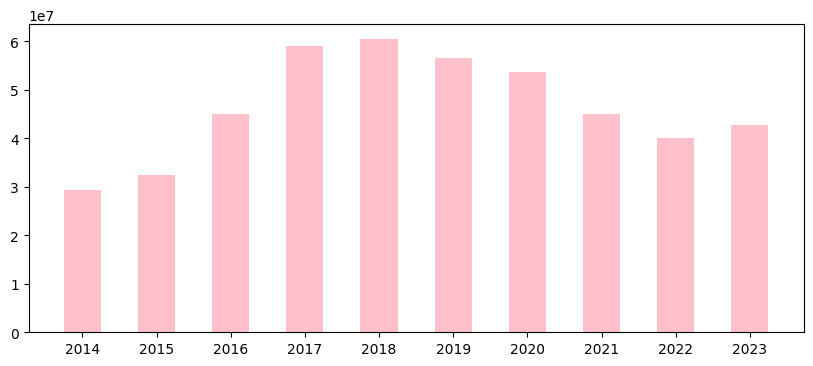

In [ ]:
x = df_gold_total["Year"]
y = df_gold_total["Volume"]


plt.figure(figsize=(10, 4))
plt.bar(x, y, width=0.5, color="pink")

plt.show()

## Car sales

### Import car sales data

In [ ]:
df_car = pd.read_csv("car_sales.csv")
df_car.head(2)

NameError: name 'pd' is not defined

In [ ]:
df_car_gen = df_car["Gender"].value_counts()
df_car_gen

Male      18798
Female     5108
Name: Gender, dtype: int64

In [ ]:
df_car_color = df_car["Color"].value_counts()
df_car_color

Pale White    11256
Black          7857
Red            4793
Name: Color, dtype: int64

In [ ]:
df_car_style = ...
df_car_style

SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: Body Style, dtype: int64

In [ ]:
df_car_trans = ...
df_car_trans

Auto      12571
Manual    11335
Name: Transmission, dtype: int64

Get the x, y axes values



In [ ]:
x_gen = df_car_gen.index
y_gen = df_car_gen
x_col = df_car_color.index
y_col = df_car_color
x_style = ...
y_style = ...
x_tran = ...
y_tran = ...

###Create subplots of:

1. Genders
2. Car colors
3. Styles
4. Transmission

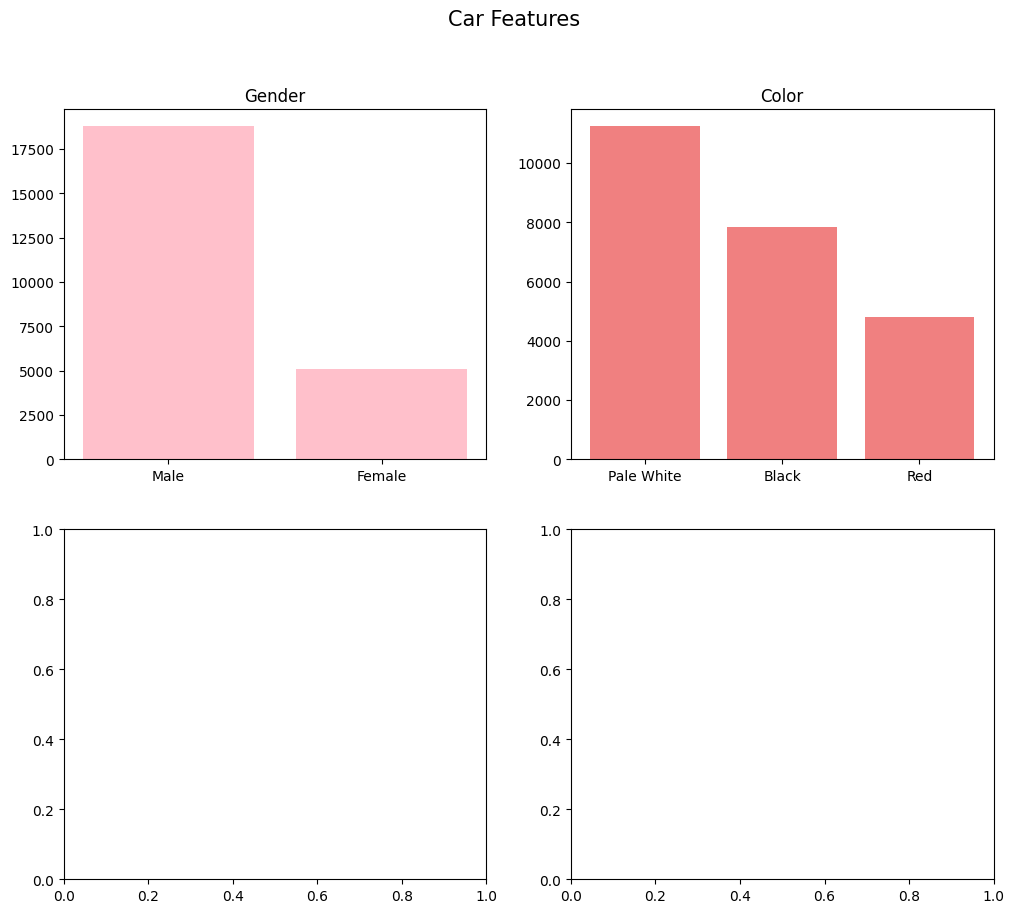

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 10))
fig.suptitle("Car Features", fontsize=15)

axes[0,0].bar(x_gen, y_gen, color="pink")
axes[0,0].set_title("Gender")

axes[0,1].bar(x_col, y_col, color="lightcoral")
axes[0,1].set_title("Color")

...

plt.show()